In [1]:
from IPython.display import Image
from keras.preprocessing import image
from keras import optimizers
from keras import layers,models
from keras.applications.imagenet_utils import preprocess_input
from keras import regularizers
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
import numpy as np
from tensorflow.keras import models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
import itertools

from keras import losses
from keras import optimizers
from keras import metrics
from keras.optimizers import Adam

from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
train_dir = '/content/drive/MyDrive/Road Sign Detector Image Dataset.v1i.clip/train'
test_dir = '/content/drive/MyDrive/Road Sign Detector Image Dataset.v1i.clip/test'
validation_dir = '/content/drive/My Drive/DatasetForANN/Vali'

In [5]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_dir,
    target_size=(224,224),
    classes=['- (1)', '- (2)', '- (3)', '- (4)', '- (5)', '- (6)', '- (7)', '- (8)', '- (9)', '- (10)', '- (11)', '- (12)', '- (13)', '- (14)', '- (15)', '- (16)', '- (17)', '- (18)', '- (19)', '- (20)', '- (21)', '- (22)', '- (23)', '- (24)', '- (25)', '(26)', '- (27)', '- (28)', '- (29)', '- (30)', '- (31)', '- (32)', '- (33)', '- (34)', '- (35)', '- (36)', '- (37)'],
    batch_size=16)

test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory= test_dir,
    target_size=(224,224),
    classes=['- (1)', '- (2)', '- (3)', '- (4)', '- (5)', '- (6)', '- (7)', '- (8)', '- (9)', '- (10)', '- (11)', '- (12)', '- (13)', '- (14)', '- (15)', '- (16)', '- (17)', '- (18)', '- (19)', '- (20)', '- (21)', '- (22)'],
    batch_size=16,
    shuffle=False)

Found 2720 images belonging to 37 classes.
Found 186 images belonging to 22 classes.


In [6]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

In [7]:
# Define the VGG16 model

model = models.Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

model.add(Flatten())
model.add(Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(37, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 128)       0         
 g2D)                                                   

In [8]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
model.fit(x=train_batches,
          steps_per_epoch=len(train_batches),
          epochs=20,
          verbose=2
         )

Epoch 1/20
170/170 - 78s - loss: 55.5916 - accuracy: 0.0489 - 78s/epoch - 459ms/step
Epoch 2/20
170/170 - 42s - loss: 15.2087 - accuracy: 0.0897 - 42s/epoch - 249ms/step
Epoch 3/20
170/170 - 42s - loss: 7.6322 - accuracy: 0.1320 - 42s/epoch - 248ms/step
Epoch 4/20
170/170 - 42s - loss: 5.0317 - accuracy: 0.3290 - 42s/epoch - 247ms/step
Epoch 5/20
170/170 - 43s - loss: 3.5703 - accuracy: 0.6173 - 43s/epoch - 251ms/step
Epoch 6/20
170/170 - 43s - loss: 2.7850 - accuracy: 0.7956 - 43s/epoch - 252ms/step
Epoch 7/20
170/170 - 42s - loss: 2.2764 - accuracy: 0.8831 - 42s/epoch - 249ms/step
Epoch 8/20
170/170 - 42s - loss: 1.9065 - accuracy: 0.9349 - 42s/epoch - 249ms/step
Epoch 9/20
170/170 - 42s - loss: 1.6787 - accuracy: 0.9559 - 42s/epoch - 249ms/step
Epoch 10/20
170/170 - 42s - loss: 1.4714 - accuracy: 0.9665 - 42s/epoch - 247ms/step
Epoch 11/20
170/170 - 42s - loss: 1.3085 - accuracy: 0.9724 - 42s/epoch - 247ms/step
Epoch 12/20
170/170 - 42s - loss: 1.2892 - accuracy: 0.9680 - 42s/epoch 

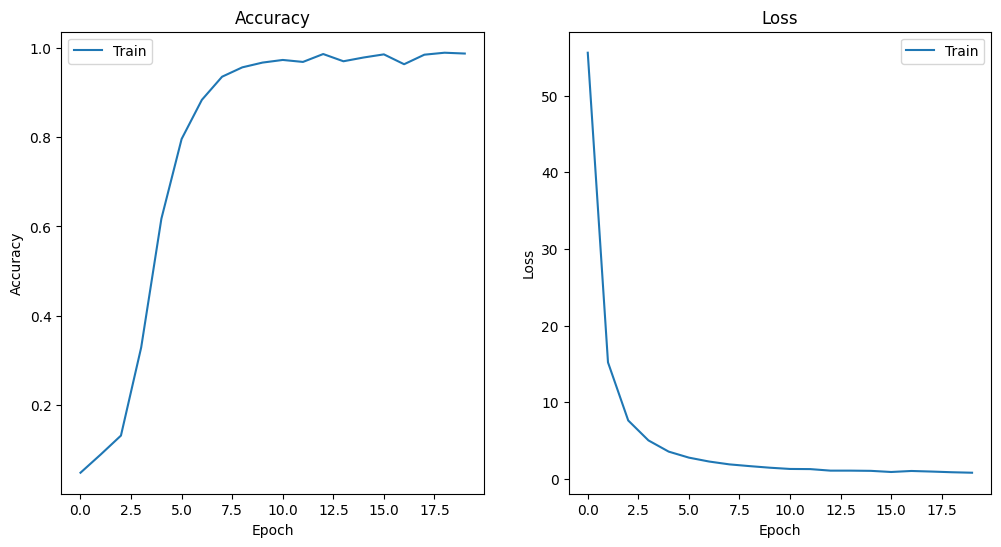

In [10]:
# Plot accuracy and loss
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(model.history.history['accuracy'])
#plt.plot(model.history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(model.history.history['loss'])
#plt.plot(model.history.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

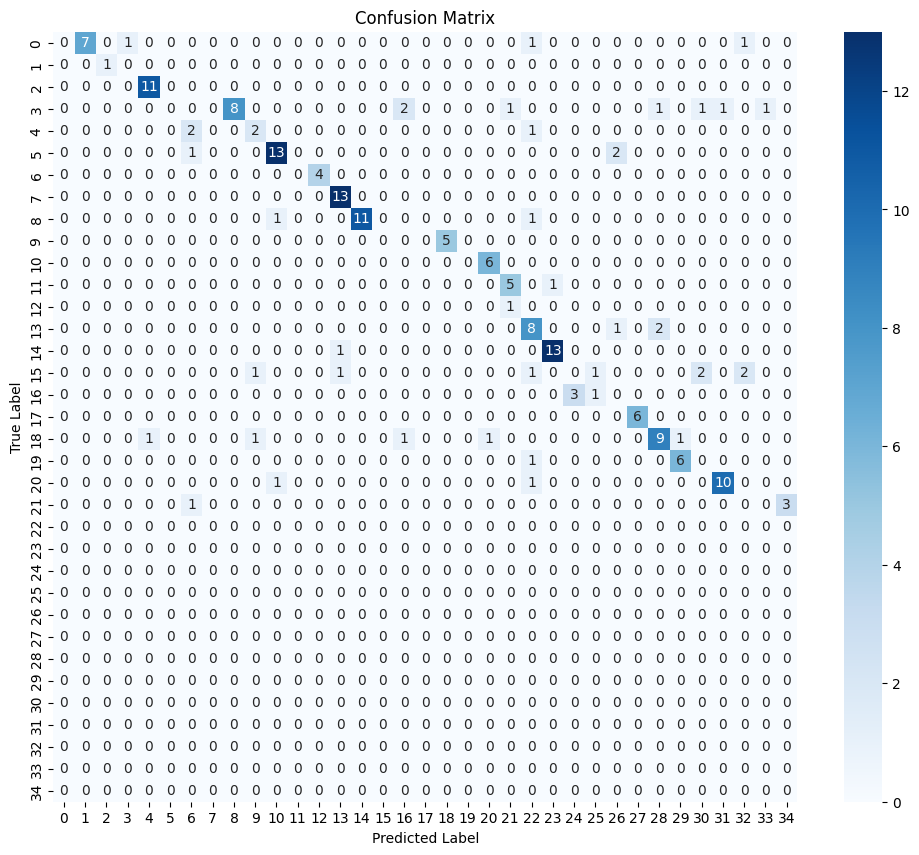

In [18]:
# Compute confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred.argmax(axis=1))

# Plot confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [21]:
# Analyze false positives and false negatives
# Get the index of false positives and false negatives
false_positives = []
false_negatives = []
for i, (y_t, y_p) in enumerate(zip(y_true, y_pred.argmax(axis=1))):
    if y_t != y_p:
        if y_p > y_t:
            false_positives.append(i)
        else:
            false_negatives.append(i)

print(f"Number of false positives: {len(false_positives)}")
print(f"Number of false negatives: {len(false_negatives)}")



Number of false positives: 178
Number of false negatives: 8
